# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "33018c2bbd554247ef271b945a42450a46bd6b8f"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O options_straddle.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/options_straddle.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' options_straddle.py

In [5]:
from options_straddle import StrategyOptionsStraddle as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130280,
 'strategyId': '75310a4e6479441a9b6f0d5771f482d7'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('NIFTY BANK', exchange='NSE')
instrument

[{'id': 5669, 'value': 'NSE:NIFTY BANK'}]

## Setup Parameters

In [9]:
parameters = {
    'LEG_ONE_NUMBER_OF_STRIKES': 0,
    'LEG_ONE_STRIKE_DIRECTION': 1,
    'LEG_ONE_TRADING_SYMBOL_SUFFIX': 1,
    'LEG_ONE_TRANSACTION_TYPE': 2,
    
    'LEG_TWO_NUMBER_OF_STRIKES': 0,
    'LEG_TWO_STRIKE_DIRECTION': 1,
    'LEG_TWO_TRADING_SYMBOL_SUFFIX': 2,
    'LEG_TWO_TRANSACTION_TYPE': 2
}

In [10]:
initial_virtual_funds = 1450000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:NIFTY 50', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Options Straddle Template' in BACKTESTING mode...
╒═════════════════════════╤══════════════════════════════════════╕
│ Config                  │ Value                                │
╞═════════════════════════╪══════════════════════════════════════╡
│ Strategy Name           │ Options Straddle Template            │
├─────────────────────────┼──────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                          │
├─────────────────────────┼──────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:NIFTY 50']                     │
├─────────────────────────┼──────────────────────────────────────┤
│ Quantity/Lots           │ 10                                   │
├─────────────────────────┼──────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30            │
├─────────────────────────┼──────────────────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30  

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

In [17]:
print(logs)

[2023-08-24 20:04:25] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-24 20:04:31] Sanity checks on cfg successful.
[2023-08-24 20:04:31] Currency set to "INR"
[2023-08-24 20:04:31] Setting up broker connection...
[2023-08-24 20:04:32] Broker connection has been setup successfully.
[2023-08-24 20:04:32] (NSE_IDX) Funds available in client's ABVIRTUALBROKER account is : INR '1450000.00'
[2023-08-24 20:04:32] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-24 20:04:32] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-24 20:04:32] Reading strategy...
[2023-08-24 20:04:33] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #  

### Stop

In [18]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [19]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NFO      NIFTY05AUG2115750PE 2021-08-01 09:15:00+05:30   
1                  NFO      NIFTY05AUG2115750CE 2021-08-01 09:15:00+05:30   
2                  NFO      NIFTY05AUG2115850PE 2021-08-02 09:15:00+05:30   
3                  NFO      NIFTY05AUG2115850CE 2021-08-02 09:15:00+05:30   
4                  NFO      NIFTY05AUG2115950PE 2021-08-03 09:15:00+05:30   
..                 ...                      ...                       ...   
971                NFO      NIFTY27JUL2319850CE 2023-07-27 09:15:00+05:30   
972                NFO      NIFTY03AUG2319650PE 2023-07-28 09:15:00+05:30   
973                NFO      NIFTY03AUG2319650CE 2023-07-28 09:15:00+05:30   
974                NFO      NIFTY03AUG2319650PE 2023-07-31 09:15:00+05:30   
975                NFO      NIFTY03AUG2319650CE 2023-07-31 09:15:00+05:30   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                     SELL             500              ₹        72.25   
1                     SELL             500              ₹        88.95   
2                     SELL             500              ₹        75.00   
3                     SELL             500              ₹        70.00   
4                     SELL             500              ₹       100.55   
..                     ...             ...            ...          ...   
971                   SELL             500              ₹        35.10   
972                   SELL             500              ₹        88.00   
973                   SELL             500              ₹       170.05   
974                   SELL             500              ₹        85.35   
975                   SELL             500              ₹       105.25   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2021-08-01 15:30:00+05:30                   BUY            500   
1   2021-08-01 15:30:00+05:30                   BUY            500   
2   2021-08-02 15:30:00+05:30                   BUY            500   
3   2021-08-02 15:30:00+05:30                   BUY            500   
4   2021-08-03 15:30:00+05:30                   BUY            500   
..                        ...                   ...            ...   
971 2023-07-27 15:30:00+05:30                   BUY            500   
972 2023-07-28 15:30:00+05:30                   BUY            500   
973 2023-07-28 15:30:00+05:30                   BUY            500   
974 2023-07-31 15:30:00+05:30                   BUY            500   
975 2023-07-31 15:30:00+05:30                   BUY            500   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               ₹       72.25           0.0                      0.0  
1               ₹       88.95           0.0                      0.0  
2               ₹       54.65       10175.0                  10175.0  
3               ₹       83.40       -6700.0                   3475.0  
4               ₹       26.10       37225.0                  40700.0  
..            ...         ...           ...                      ...  
971             ₹        0.20       17450.0                1949850.0  
972             ₹       85.35        1325.0                1951175.0  
973             ₹      105.25       32400.0                1983575.0  
974             ₹       85.35           0.0                1983575.0  
975             ₹      105.25           0.0                1983575.0  

[976 rows x 14 columns]

### Statistics Reports

#### Statistics

In [20]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-01
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   136.8%
CAGR﹪              53.97%

Sharpe              1.5
Prob. Sharpe Ratio  97.9%
Sortino             2.12
Sortino/√2          1.5
Omega               1.3

Max Drawdown        -12.0%
Longest DD Days     63

Gain/Pain Ratio     0.3
Gain/Pain (1M)      10.54

Payoff Ratio        0.87
Profit Factor       1.3
Common Sense Ratio  1.17
CPC Index           0.67
Tail Ratio          0.9
Outlier Win Ratio   3.58
Outlier Loss Ratio  3.67

MTD                 0.97%
3M                  1.6%
6M                  14.64%
YTD                 14.44%
1Y                  30.82%
3Y (ann.)           53.97%
5Y (ann.)           53.97%
10Y (ann.)          53.97%
All-time (ann.)     53.97%

Avg. Drawdown       -3.28%
Avg. Drawdown Days  12
Recovery Factor     11.4
Ulcer Index         0.03
Serenity Index      15.08


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-01
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          136.8%
CAGR﹪                     53.97%

Sharpe                     1.5
Prob. Sharpe Ratio         97.9%
Smart Sharpe               1.09
Sortino                    2.12
Smart Sortino              1.54
Sortino/√2                 1.5
Smart Sortino/√2           1.09
Omega                      1.3

Max Drawdown               -12.0%
Longest DD Days            63
Volatility (ann.)          33.44%
Calmar                     4.5
Skew                       -0.51
Kurtosis                   2.48

Expected Daily %           0.18%
Expected Monthly %         3.66%
Expected Yearly %          33.29%
Kelly Criterion            13.68%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.27%
Expected Shortfall (cVaR)  -3.27%

Max Consecutive Wins       7
M

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-11-18  2021-11-26  2021-11-30    12    -12.000483         -5.943211
2  2021-10-18  2021-10-29  2021-11-10    23     -9.254730         -9.198504
3  2022-06-10  2022-06-16  2022-07-11    31     -9.013539         -8.772704
4  2022-04-04  2022-05-23  2022-06-02    59     -8.837331         -8.404014
5  2022-01-18  2022-01-24  2022-02-09    22     -8.364048         -5.996886

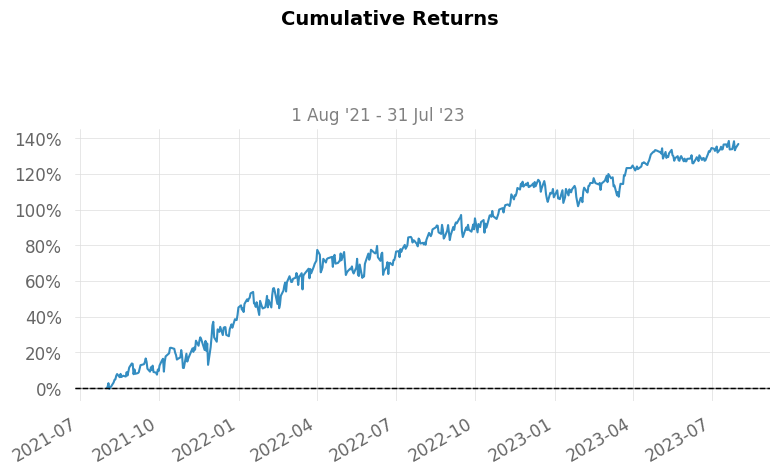

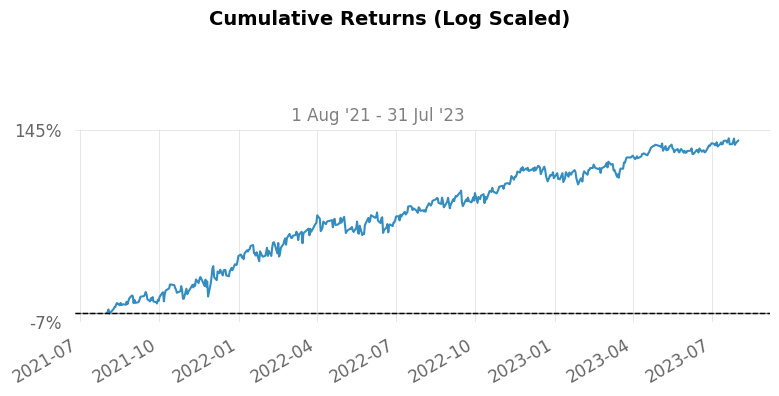

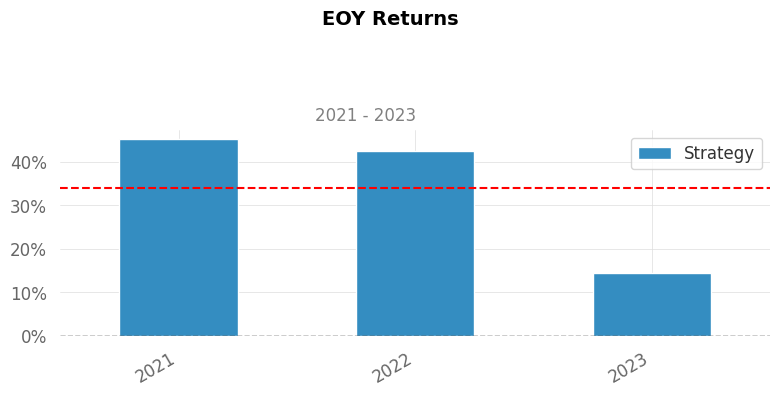

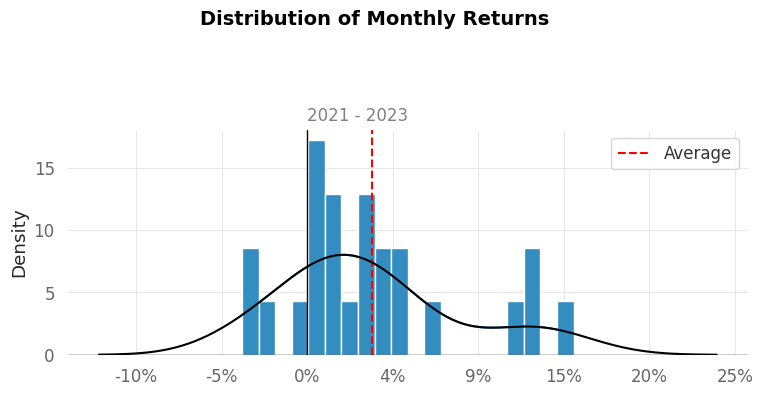

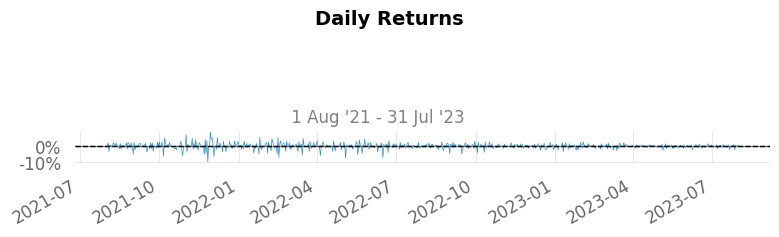

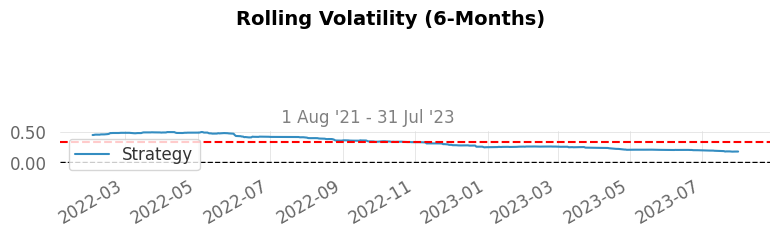

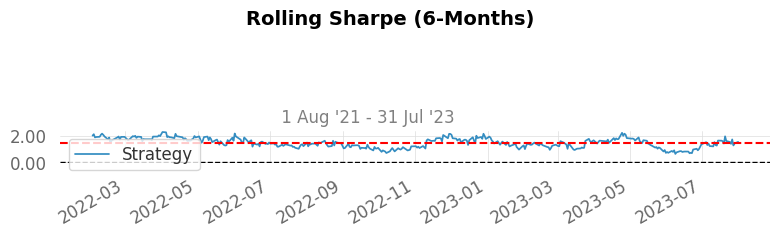

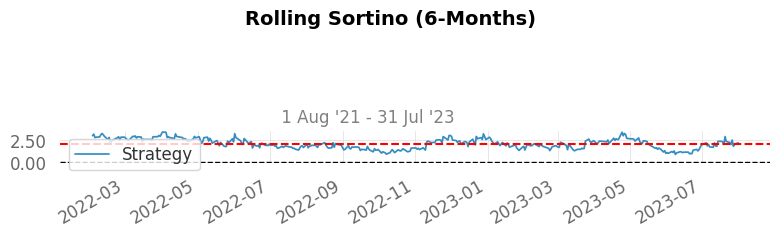

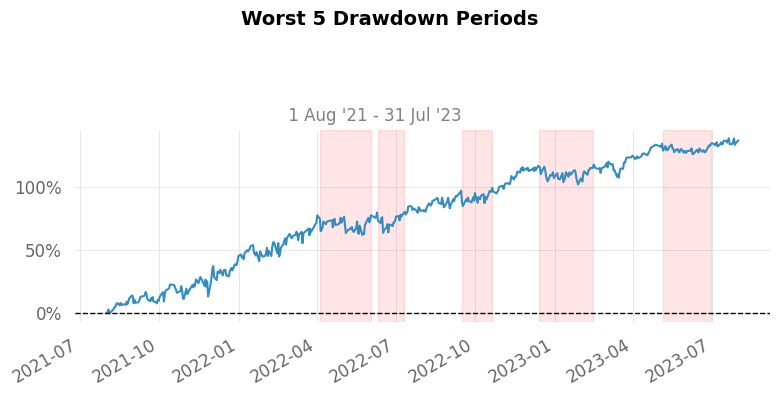

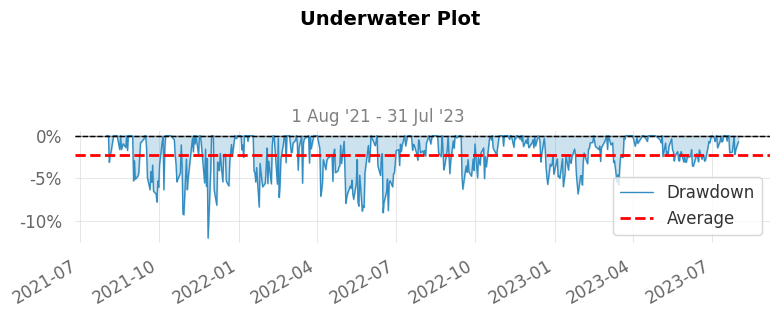

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


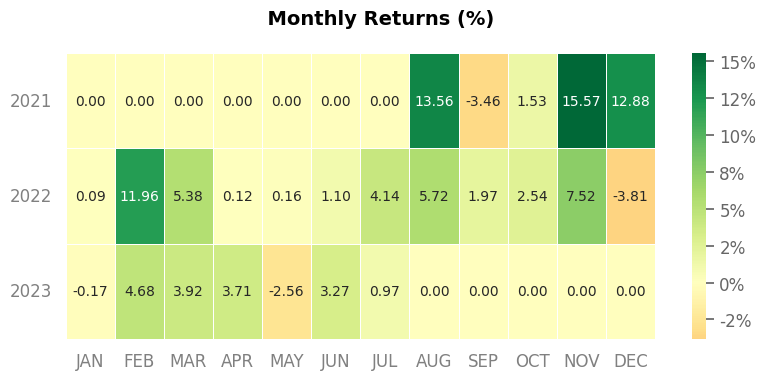

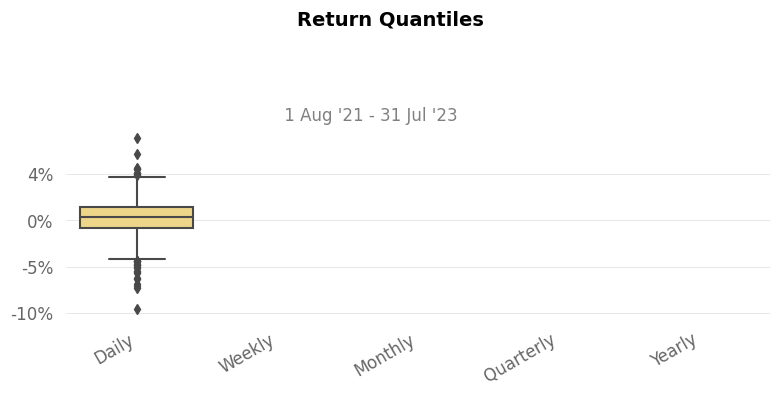

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [21]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [22]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+------------------------------------+---------------------------+----------------------------------+------+
| INST                               | TIME                      | ID                               | TT   |
|------------------------------------+---------------------------+----------------------------------+------|
| NSE_FO:NIFTY05AUG2115750CE [LOCAL] | 2021-08-01 09:15:00+05:30 | 54e6f81e9622466abd249f589d615ac5 | SELL |
+------------------------------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-01 09:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-01 09:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-01 09:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-01 09:15:00+05:30 | OPEN      

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 +0530', 
    end='15:00 +0530', 
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)